# Binary Classifier neural networks

## 1) Event data feedforward neural network (FNN)

This section contains the run code for a simple feedforward neural network to classify different event types.

### Imports

In [1]:
# Code from other files in the repo
import models.sequential_models as sequential_models
import utilities.plotlib as plotlib

# Python libraries
import pickle
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Running tensorflow on CPU


### Data setup

In [2]:
SAVE_FOLDER = 'data_binary_classifier'
DIR = SAVE_FOLDER + '\\'

# Load files
event_data = np.load(DIR+'preprocessed_event_data.npy', allow_pickle=True)
sample_weight = np.load(DIR+'preprocessed_sample_weights.npy', allow_pickle=True)
encoding_dict = pickle.load(open(DIR+'encoding_dict.pickle', 'rb'))
event_labels = pd.read_hdf(DIR+'preprocessed_event_labels.hdf')
event_labels = event_labels.values

test_fraction = 0.2
data_train, data_test, labels_train, labels_test, sw_train, sw_test  = \
    train_test_split(event_data, event_labels, 
                     sample_weight, test_size=test_fraction)

# Take a sample of the data to speed up training
sample_num = -1
data_train = data_train[:sample_num]
data_test = data_test[:sample_num]
labels_train = labels_train[:sample_num]
labels_test = labels_test[:sample_num]
sw_train = sw_train[:sample_num]
sw_test = sw_test[:sample_num]

### Model training

Using a dense/fully connected neural network with 2 hidden layers.
First layer with 64 nodes, second with 8 nodes.

In [3]:
model = sequential_models.base2(64, 8, input_shape=11, learning_rate=0.001)

print("Fitting sequential model on event training data...")
START = time.time()
history = model.fit(data_train, labels_train, batch_size = 128,
                    validation_data=(data_test, labels_test), 
                    sample_weight=sw_train, epochs=16, verbose=2)
print(f"    Elapsed training time: {time.time()-START:0.2f}s")

test_loss, test_acc = model.evaluate(data_test, labels_test, verbose=2)
print(f"    Test accuracy: {test_acc:0.5f}")

Fitting sequential model on event training data...
Epoch 1/16
4878/4878 - 3s - loss: 1.7728e-06 - accuracy: 0.5598 - val_loss: 0.6811 - val_accuracy: 0.6399
Epoch 2/16
4878/4878 - 3s - loss: 1.6555e-06 - accuracy: 0.6290 - val_loss: 0.6316 - val_accuracy: 0.6337
Epoch 3/16
4878/4878 - 3s - loss: 1.5390e-06 - accuracy: 0.6424 - val_loss: 0.6110 - val_accuracy: 0.6546
Epoch 4/16
4878/4878 - 3s - loss: 1.5260e-06 - accuracy: 0.6448 - val_loss: 0.6023 - val_accuracy: 0.6617
Epoch 5/16
4878/4878 - 3s - loss: 1.5209e-06 - accuracy: 0.6453 - val_loss: 0.6081 - val_accuracy: 0.6565
Epoch 6/16
4878/4878 - 3s - loss: 1.5167e-06 - accuracy: 0.6467 - val_loss: 0.6178 - val_accuracy: 0.6477
Epoch 7/16
4878/4878 - 3s - loss: 1.5140e-06 - accuracy: 0.6468 - val_loss: 0.6156 - val_accuracy: 0.6493
Epoch 8/16
4878/4878 - 3s - loss: 1.5115e-06 - accuracy: 0.6470 - val_loss: 0.6250 - val_accuracy: 0.6393
Epoch 9/16
4878/4878 - 3s - loss: 1.5090e-06 - accuracy: 0.6472 - val_loss: 0.6183 - val_accuracy: 0.

### Plot training history


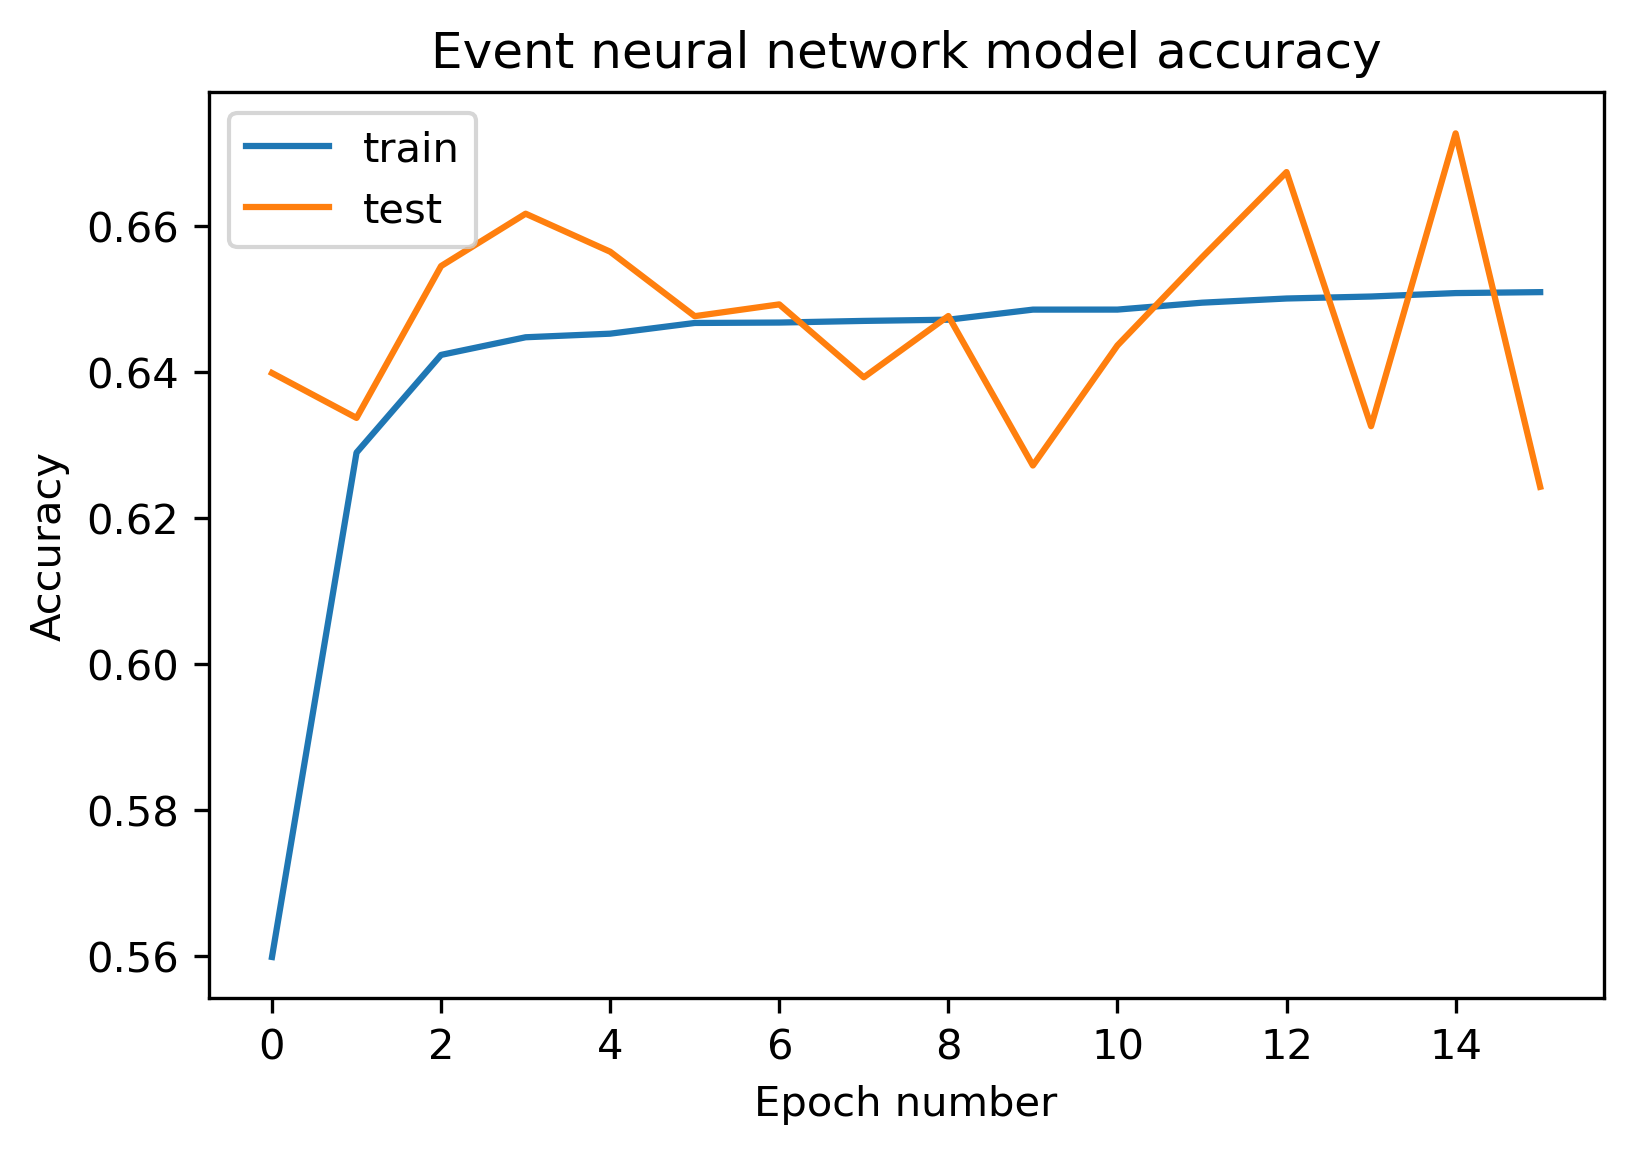

In [4]:
fig1 = plotlib.training_history_plot(history, 'Event neural network model accuracy')

### Get model predictions

In [5]:
# Get model predictions
labels_pred = model.predict(data_test)

# Convert predictions into binary values
cutoff_threshold = 0.5 
labels_pred_binary = np.where(labels_pred > cutoff_threshold, 1, 0)

### Plot confusion matrix

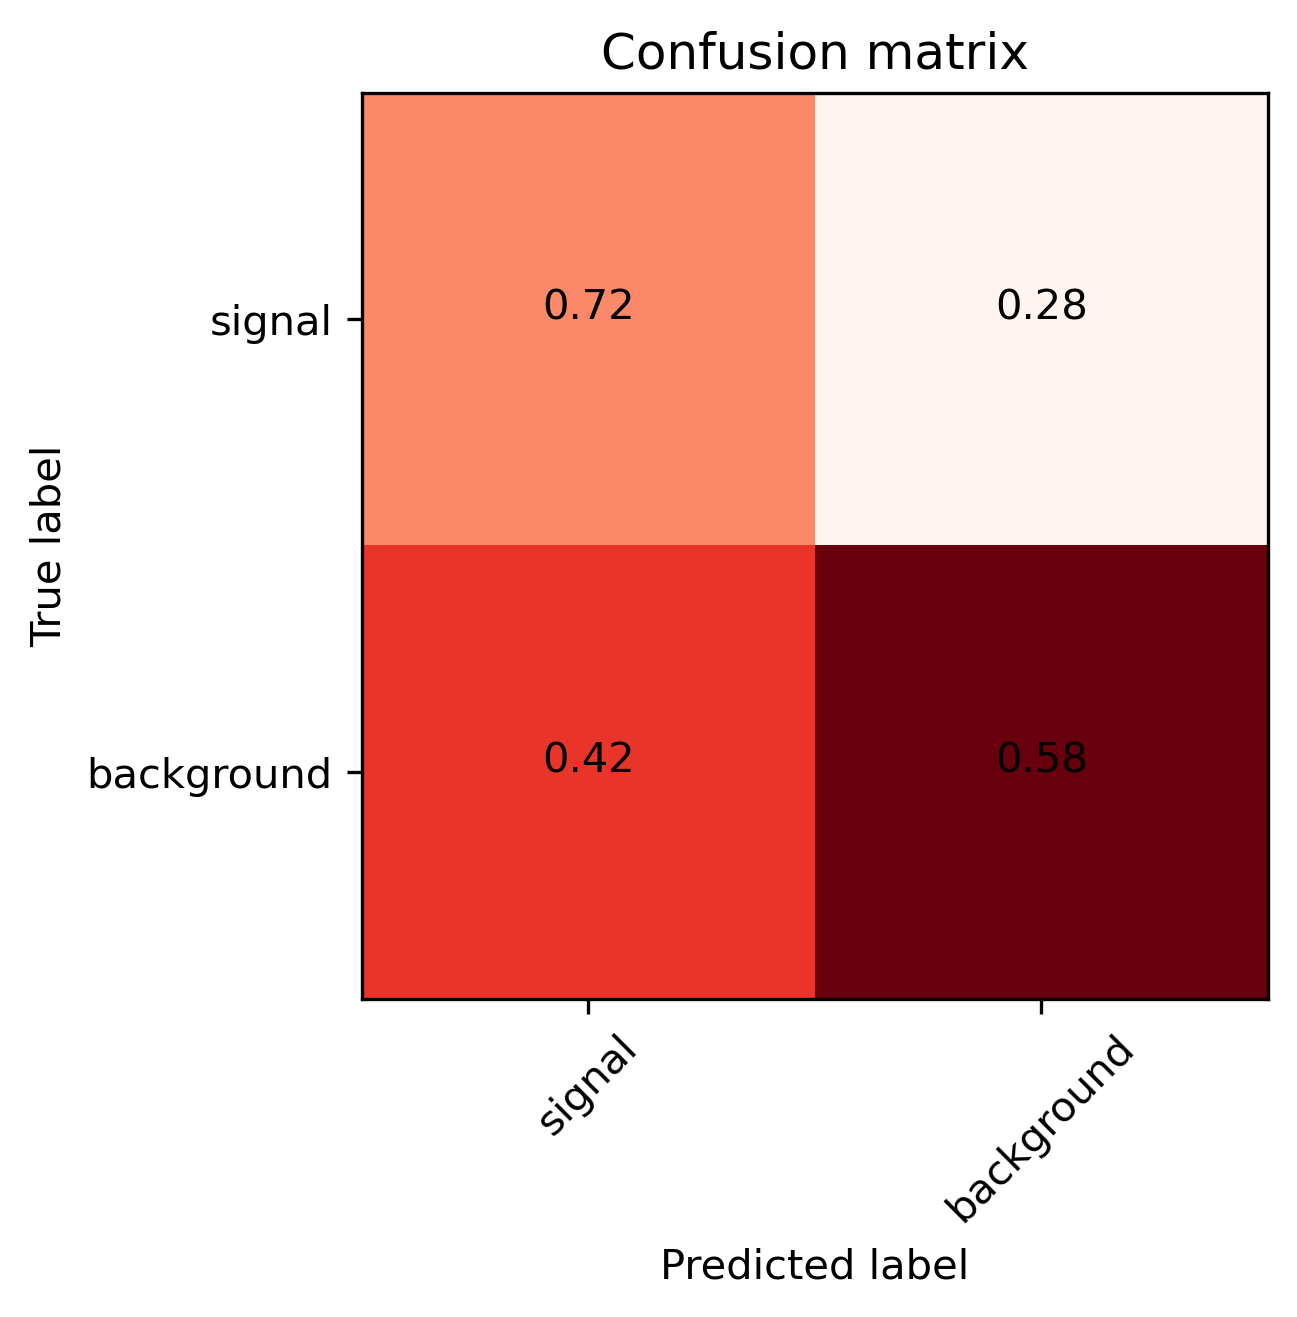

In [6]:
# Make confsuion matrix
cm = confusion_matrix(labels_test, labels_pred_binary)
class_names = ['signal', 'background']
title = 'Confusion matrix'

# Plot confusion matrix
fig2 = plotlib.confusion_matrix(cm, class_names, title)

### Plot ROC curve

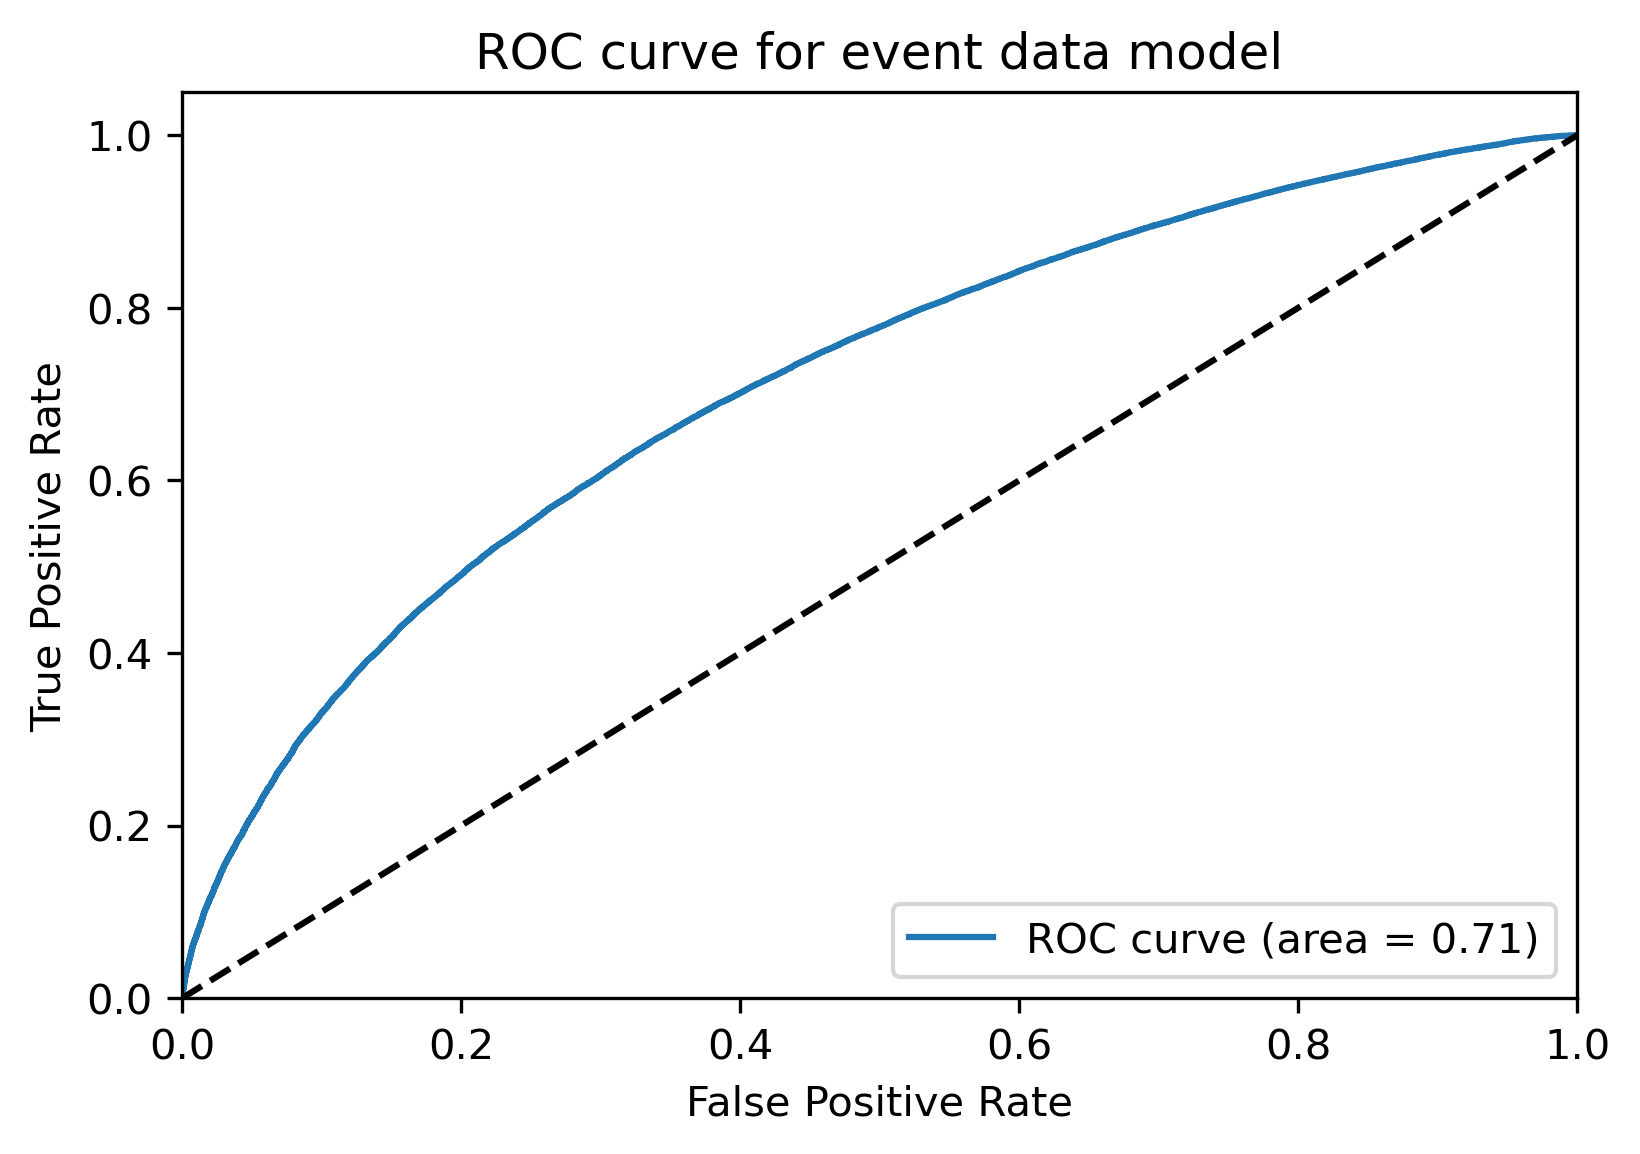

In [7]:
title_roc = 'ROC curve for event data model'
fig3 = plotlib.plot_roc(labels_pred, labels_test, title_roc)

### Plot distribution of discriminator values

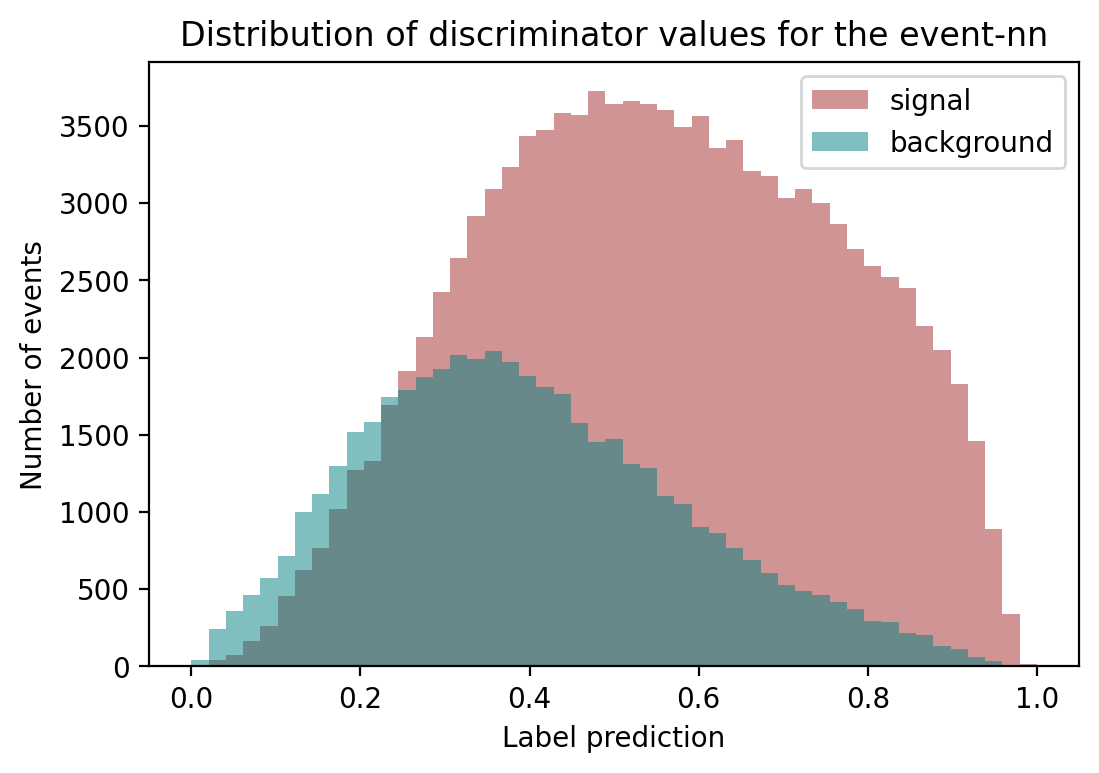

In [8]:
bins = np.linspace(0, 1, 50)

fig = plt.figure(figsize=(6, 4), dpi=200)

plt.title("Distribution of discriminator values for the event-nn")
plt.xlabel("Label prediction")
plt.ylabel("Number of events")
# plt.xlim(0, 10)

labels_pred_signal = labels_pred[np.array(labels_test, dtype=bool)]
labels_pred_background = labels_pred[np.invert(np.array(labels_test, dtype=bool))]

# plt.hist(labels_pred, bins, alpha=0.5, label='all events')
plt.hist(labels_pred_signal, bins, alpha=0.5, label='signal', color='brown')
plt.hist(labels_pred_background, bins, alpha=0.5, label='background', color='teal')

plt.legend(loc='upper right')
plt.show()